In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [3]:
car=pd.read_csv('../Data/Australian Vehicle Prices.csv')

In [4]:
car.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [5]:
car.shape

(16734, 19)

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

In [7]:
car['Price'].unique()

array(['51990', '19990', '108988', ..., '21989', '36770', '35280'],
      dtype=object)

# Year column contain null value and all are float type

In [8]:
car = car.dropna(subset=['Year'])
car['Year'] = car['Year'].astype(int)

In [9]:
car.shape

(16733, 19)

# Price column string data and contain value 'POA' value which not able to convert integer. remove all such values

In [10]:
car = car[car['Price'].apply(lambda x: str(x).isdigit())]  # Keep only rows with numeric values
car['Price'] = car['Price'].astype(int)



In [11]:
type(car['Price'][0])

numpy.int64

In [12]:
car.shape

(16681, 19)

In [13]:
car['Seats'].unique()

array([' 7 Seats', ' 5 Seats', ' 4 Seats', nan, ' 2 Seats', ' 3 Seats',
       ' 14 Seats', ' 8 Seats', ' 6 Seats', ' 9 Seats', ' 11 Seats',
       ' 12 Seats', ' 22 Seats', ' 15 Seats'], dtype=object)

In [14]:
car = car.dropna(subset=['Seats'])
# Extract the numeric part and convert to integer
# Convert to string, extract numeric part, and convert to integer
car['Seats'] = car['Seats'].astype(str).str.extract(r'(\d+)').astype(float).astype(int)

#car['Seats'] = car['Seats'].str.extract(r'(\d+)').astype(float).astype(int)

In [15]:
car.shape

(14993, 19)

In [16]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14993 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              14993 non-null  object
 1   Year               14993 non-null  int64 
 2   Model              14993 non-null  object
 3   Car/Suv            14980 non-null  object
 4   Title              14993 non-null  object
 5   UsedOrNew          14993 non-null  object
 6   Transmission       14993 non-null  object
 7   Engine             14993 non-null  object
 8   DriveType          14993 non-null  object
 9   FuelType           14993 non-null  object
 10  FuelConsumption    14993 non-null  object
 11  Kilometres         14993 non-null  object
 12  ColourExtInt       14993 non-null  object
 13  Location           14551 non-null  object
 14  CylindersinEngine  14993 non-null  object
 15  BodyType           14993 non-null  object
 16  Doors              14993 non-null  object
 17

In [17]:
car['Location'].unique()

array(['Caringbah, NSW', 'Brookvale, NSW', 'Sylvania, NSW',
       'Mount Druitt, NSW', 'Castle Hill, NSW', 'Blacktown, NSW',
       'Wentworthville, NSW', 'Mcgraths Hill, NSW', 'Lidcombe, NSW',
       'Five Dock, NSW', 'Haberfield, NSW', 'Cabramatta, NSW',
       'Glebe, NSW', 'Camden, NSW', 'Lansvale, NSW', 'Croydon, NSW',
       'Pendle Hill, NSW', 'Smithfield, NSW', 'Seven Hills, NSW',
       'Granville, NSW', 'Minchinbury, NSW', 'Ryde, NSW',
       'Ingleburn, NSW', 'Homebush, NSW', 'Elderslie, NSW',
       'Campbelltown, NSW', 'Bankstown, NSW', 'North Narrabeen, NSW',
       'Chester Hill, NSW', 'Liverpool, NSW', 'West Ryde, NSW',
       'Kirrawee, NSW', 'Minto, NSW', 'Windsor, NSW', 'Penrith, NSW',
       'Kogarah, NSW', 'South Windsor, NSW', 'Artarmon, NSW',
       'Arncliffe, NSW', 'Darlinghurst, NSW', 'Eastern Creek, NSW',
       'Rydalmere, NSW', 'Carlton, NSW', 'Leichhardt, NSW',
       'Punchbowl, NSW', 'Strathfield, NSW', 'Wollongong, NSW',
       'Banksia, NSW', 'Adamsto

In [18]:
car = car.dropna(subset=['Location'])

In [19]:
car.shape

(14551, 19)

In [20]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14551 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              14551 non-null  object
 1   Year               14551 non-null  int64 
 2   Model              14551 non-null  object
 3   Car/Suv            14551 non-null  object
 4   Title              14551 non-null  object
 5   UsedOrNew          14551 non-null  object
 6   Transmission       14551 non-null  object
 7   Engine             14551 non-null  object
 8   DriveType          14551 non-null  object
 9   FuelType           14551 non-null  object
 10  FuelConsumption    14551 non-null  object
 11  Kilometres         14551 non-null  object
 12  ColourExtInt       14551 non-null  object
 13  Location           14551 non-null  object
 14  CylindersinEngine  14551 non-null  object
 15  BodyType           14551 non-null  object
 16  Doors              14551 non-null  object
 17

In [21]:
car['Doors'].unique()

array([' 4 Doors', ' 5 Doors', ' 2 Doors', ' 3 Doors'], dtype=object)

In [22]:
car = car.dropna(subset=['Doors'])
# Extract the numeric part and convert to integer
# Convert to string, extract numeric part, and convert to integer
car['Doors'] = car['Doors'].astype(str).str.extract(r'(\d+)').astype(float).astype(int)

#car['Seats'] = car['Seats'].str.extract(r'(\d+)').astype(float).astype(int)

In [23]:
car["Doors"].unique()

array([4, 5, 2, 3])

In [24]:
car["CylindersinEngine"].unique()

array(['4 cyl', '8 cyl', '3 cyl', '6 cyl', '5 cyl', '12 cyl', '0 L',
       '2 cyl', '10 cyl'], dtype=object)

In [25]:
car = car.dropna(subset=['CylindersinEngine'])
# Extract the numeric part and convert to integer
# Convert to string, extract numeric part, and convert to integer
car['CylindersinEngine'] = car['CylindersinEngine'].astype(str).str.extract(r'(\d+)').astype(float).astype(int)

In [26]:
car['CylindersinEngine'].unique()

array([ 4,  8,  3,  6,  5, 12,  0,  2, 10])

In [27]:
car['ColourExtInt'].unique()

array(['White / Black', 'Black / Black', 'Grey / White', 'White / Brown',
       'Grey / Black', 'Red / Grey', 'Black / -', 'Blue / -',
       'White / Grey', 'Silver / -', 'Blue / Black', 'Silver / Black',
       'Silver / Grey', 'Grey / -', 'White / -', 'Black / Tobacco',
       'Red / -', 'White / Black Cloth', 'Black / Black Cloth',
       'Silver / Black Leather', 'Red / Black', 'Red / Black Cloth',
       'Grey / Grey', 'Black / Storm Grey', 'White / Grey  Cloth',
       'Green / Black', 'Yellow / -', 'Black / Leather',
       'Red / Black  Cloth', 'Orange / Grey', 'Gold / Black',
       'Silver / Cloth', 'Grey / Black Leather', 'Black / Grey',
       'Brown / Black', '- / -', 'Blue / Grey', 'White / Black Leather',
       'Grey / Red', 'Green / -', 'Grey / Beige', 'Brown / Grey',
       'Gold / -', 'Blue / Knight Black Synthetic Leather',
       'Black / Beige', 'Black / Black Leather', '- / Black', '- / Car',
       'Brown / Black Leather', 'Gold / Black Leather',
       'Black

In [28]:
car['Kilometres'].unique()

array(['5595', '16', '8472', ..., '5165', '85525', '31852'], dtype=object)

In [29]:
car['Kilometres'] = pd.to_numeric(car['Kilometres'].astype('str').str.extract(r'(\d+)')[0], errors='coerce')
#car['Kilometres'].astype(str).astype(int)
car['Kilometres'] = car['Kilometres'].fillna(0).astype(int)

In [30]:
car['Kilometres']

0          5595
1            16
2          8472
3        136517
4          1035
          ...  
16727     54359
16728     32977
16731      5165
16732     85525
16733     31852
Name: Kilometres, Length: 14551, dtype: int64

In [31]:

car['FuelConsumption']

0        8.7 L / 100 km
1        6.7 L / 100 km
2        6.6 L / 100 km
3         11 L / 100 km
4          6 L / 100 km
              ...      
16727    6.9 L / 100 km
16728    6.9 L / 100 km
16731    6.2 L / 100 km
16732    7.2 L / 100 km
16733      7 L / 100 km
Name: FuelConsumption, Length: 14551, dtype: object

In [32]:
car = car.dropna(subset=['FuelConsumption'])
# Extract the numeric part (including decimal) and convert to float
car['FuelConsumption'] = car['FuelConsumption'].str.extract(r'(\d+\.\d+)').astype(float)


In [33]:
car['FuelConsumption']

0        8.7
1        6.7
2        6.6
3        NaN
4        NaN
        ... 
16727    6.9
16728    6.9
16731    6.2
16732    7.2
16733    NaN
Name: FuelConsumption, Length: 14551, dtype: float64

In [34]:
car = car.dropna(subset=['FuelConsumption'])
car['FuelConsumption']

0        8.7
1        6.7
2        6.6
6        5.1
8        7.1
        ... 
16725    1.7
16727    6.9
16728    6.9
16731    6.2
16732    7.2
Name: FuelConsumption, Length: 12752, dtype: float64

In [35]:
car['FuelType'].unique()

array(['Diesel', 'Premium', 'Hybrid', 'Unleaded', '-', 'LPG'],
      dtype=object)

In [36]:
#car['FuelType'] = pd.to_numeric(car['FuelType'].astype('str').str.extract(r'(\d+)')[0], errors='coerce')
#car['Kilometres'].astype(str).astype(int)
#car['FuelType'] = car['FuelType'].fillna(0).astype(str)
car = car[car['FuelType'] != '-']

In [37]:
car['FuelType'].unique()

array(['Diesel', 'Premium', 'Hybrid', 'Unleaded', 'LPG'], dtype=object)

In [38]:
car['DriveType'].unique()

array(['AWD', 'Front', 'Rear', '4WD', 'Other'], dtype=object)

In [39]:
car['Transmission'].unique()

array(['Automatic', 'Manual', '-'], dtype=object)

In [241]:
car = car[car['Transmission'] != '-']

In [242]:
car['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [40]:
car['Engine'].unique()

array(['4 cyl, 2.2 L', '4 cyl, 1.5 L', '4 cyl, 2 L', '4 cyl, 1.3 L',
       '4 cyl, 2.7 L', '4 cyl, 1.4 L', '3 cyl, 1 L', '4 cyl, 2.4 L',
       '4 cyl, 1.6 L', '6 cyl, 3 L', '4 cyl, 2.5 L', '3 cyl, 1.2 L',
       '6 cyl, 2.7 L', '4 cyl, 1.8 L', '6 cyl, 4 L', '6 cyl, 3.5 L',
       '8 cyl, 6 L', '5 cyl, 3.2 L', '4 cyl, 2.3 L', '8 cyl, 4.1 L',
       '6 cyl, 3.6 L', '4 cyl, 1.2 L', '8 cyl, 4.8 L', '6 cyl, 3.8 L',
       '4 cyl, 3 L', '5 cyl, 2.5 L', '6 cyl, 3.3 L', '3 cyl, 1.5 L',
       '4 cyl, 2.8 L', '8 cyl, 4.5 L', '12 cyl, 6.6 L', '4 cyl, 2.1 L',
       '8 cyl, 4.4 L', '8 cyl, 5 L', '8 cyl, 4.2 L', '3 cyl, 1.6 L',
       '4 cyl, 1.9 L', '6 cyl, 2.5 L', '8 cyl, 4 L', '4 cyl, 3.2 L',
       '2 cyl, 0.9 L', '8 cyl, 6.2 L', '8 cyl, 4.7 L', '6 cyl, 3.2 L',
       '8 cyl, 5.7 L', '8 cyl, 5.5 L', '4 cyl, 1.7 L', '5 cyl, 2.4 L',
       '8 cyl, 4.6 L', '6 cyl, 2.9 L', '6 cyl, 3.7 L', '3 cyl, 1.3 L',
       '6 cyl, 2.2 L', '8 cyl, 5.6 L', '8 cyl, 3.6 L', '8 cyl, 3 L',
       '6 cyl, 4.2 L', 

In [41]:
car['Engine'] = car['Engine'].str.extract(r'(\d+\.\d+)').astype(float)
car['Engine'].unique()

array([2.2, 1.5, nan, 1.3, 2.7, 1.4, 2.4, 1.6, 2.5, 1.2, 1.8, 3.5, 3.2,
       2.3, 4.1, 3.6, 4.8, 3.8, 3.3, 2.8, 4.5, 6.6, 2.1, 4.4, 4.2, 1.9,
       0.9, 6.2, 4.7, 5.7, 5.5, 1.7, 4.6, 2.9, 3.7, 5.6, 4.9, 4.3, 3.1,
       6.3, 2.6, 5.4, 3.4, 3.9, 6.5, 5.9, 0.7, 5.2])

In [42]:
car = car.dropna(subset=['Engine'])
car['Engine'].unique()

array([2.2, 1.5, 1.3, 2.7, 1.4, 2.4, 1.6, 2.5, 1.2, 1.8, 3.5, 3.2, 2.3,
       4.1, 3.6, 4.8, 3.8, 3.3, 2.8, 4.5, 6.6, 2.1, 4.4, 4.2, 1.9, 0.9,
       6.2, 4.7, 5.7, 5.5, 1.7, 4.6, 2.9, 3.7, 5.6, 4.9, 4.3, 3.1, 6.3,
       2.6, 5.4, 3.4, 3.9, 6.5, 5.9, 0.7, 5.2])

In [43]:
car['ColourExtInt'].unique()

array(['White / Black', 'Black / Black', 'Blue / -', 'White / Grey',
       'Blue / Black', 'Silver / Black', 'Black / -', 'Silver / Grey',
       'Grey / -', 'Silver / -', 'White / -', 'Black / Tobacco',
       'Red / -', 'White / Black Cloth', 'Black / Black Cloth',
       'Grey / Black', 'Silver / Black Leather', 'Green / Black',
       'Black / Leather', 'Yellow / -', 'Gold / Black', 'Silver / Cloth',
       'Grey / Grey', 'Black / Grey', 'Grey / Black Leather',
       'Red / Black', 'Grey / Red', 'Green / -', 'Brown / Grey',
       'Gold / -', '- / -', 'Red / Grey', 'Brown / Black',
       'Blue / Knight Black Synthetic Leather', 'Black / Black Leather',
       '- / Black', 'Red / Black  Cloth', '- / Car',
       'White / Grey  Cloth', 'White / Two Tone Leather', 'Blue / Grey',
       'Gold / Grey', 'Yellow / Black', 'Brown / -',
       'Silver / Grey Cloth', '- / Black Leather',
       'White / Black & Grey Cloth', 'Blue / Beige', 'White / Cloth',
       'Red / Black Cloth', 'Whi

#Reset Index

In [44]:
car=car.reset_index(drop=True)

In [45]:
car.shape

(7708, 19)

Cleaned Data

In [46]:
car.to_csv('../Data/Cleaned_Analysis_Car_data.csv')

In [47]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7708 entries, 0 to 7707
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              7708 non-null   object 
 1   Year               7708 non-null   int64  
 2   Model              7708 non-null   object 
 3   Car/Suv            7708 non-null   object 
 4   Title              7708 non-null   object 
 5   UsedOrNew          7708 non-null   object 
 6   Transmission       7708 non-null   object 
 7   Engine             7708 non-null   float64
 8   DriveType          7708 non-null   object 
 9   FuelType           7708 non-null   object 
 10  FuelConsumption    7708 non-null   float64
 11  Kilometres         7708 non-null   int64  
 12  ColourExtInt       7708 non-null   object 
 13  Location           7708 non-null   object 
 14  CylindersinEngine  7708 non-null   int64  
 15  BodyType           7708 non-null   object 
 16  Doors              7708 

In [48]:
car.describe(include='all')

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
count,7708,7708.000000,7708,7708,7708,7708,7708,7708.000000,7708,7708,7708.000000,7708.000000,7708,7708,7708.000000,7708,7708.000000,7708.000000,7708.00000
unique,54,NaN,388,166,3684,3,3,NaN,4,5,NaN,NaN,404,545,NaN,10,NaN,NaN,NaN
top,Toyota,NaN,Corolla,SUV,2021 Toyota Corolla Ascent Sport Hybrid,USED,Automatic,NaN,Front,Unleaded,NaN,NaN,White / -,"Minchinbury, NSW",NaN,SUV,NaN,NaN,NaN
freq,1603,NaN,275,2867,28,7264,6709,NaN,3751,3680,NaN,NaN,1399,300,NaN,3186,NaN,NaN,NaN
mean,NaN,2016.271147,NaN,NaN,NaN,NaN,NaN,2.394707,NaN,NaN,7.841788,99835.223145,NaN,NaN,4.432019,NaN,4.061495,5.176570,32975.11274
std,NaN,4.633629,NaN,NaN,NaN,NaN,NaN,0.873218,NaN,NaN,2.032397,74444.813148,NaN,NaN,1.026026,NaN,0.668563,1.139127,27049.12838
min,NaN,1989.000000,NaN,NaN,NaN,NaN,NaN,0.700000,NaN,NaN,1.700000,0.000000,NaN,NaN,2.000000,NaN,2.000000,2.000000,900.00000
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,1.600000,NaN,NaN,6.500000,42650.000000,NaN,NaN,4.000000,NaN,4.000000,5.000000,17886.00000
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,2.400000,NaN,NaN,7.700000,87343.000000,NaN,NaN,4.000000,NaN,4.000000,5.000000,27990.00000
75%,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,2.800000,NaN,NaN,8.900000,147286.500000,NaN,NaN,4.000000,NaN,4.000000,5.000000,39990.00000


In [49]:
car=car[car['Price']<300000]


In [50]:
car.shape

(7699, 19)

Checking relationship of Company with Price

In [51]:
car['Brand'].unique()

array(['Ssangyong', 'MG', 'Honda', 'Toyota', 'Volkswagen', 'Mitsubishi',
       'Ford', 'Subaru', 'Hyundai', 'Nissan', 'Jeep', 'Volvo',
       'Mercedes-Benz', 'Mazda', 'Holden', 'Kia', 'BMW', 'Audi',
       'Porsche', 'Suzuki', 'Peugeot', 'Lexus', 'Renault', 'Jaguar',
       'Fiat', 'Citroen', 'LDV', 'Foton', 'Mahindra', 'HSV', 'Skoda',
       'Ram', 'Mini', 'Alfa', 'Genesis', 'Dodge', 'Land', 'Chrysler',
       'Opel', 'Maserati', 'Chevrolet', 'GWM', 'McLaren', 'Great',
       'Infiniti', 'Abarth', 'Ferrari', 'Tata', 'Aston', 'Daewoo',
       'Proton', 'Smart'], dtype=object)

In [52]:
import seaborn as sns

C:\Users\USER\AppData\Local\Temp\ipykernel_5016\2851198663.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


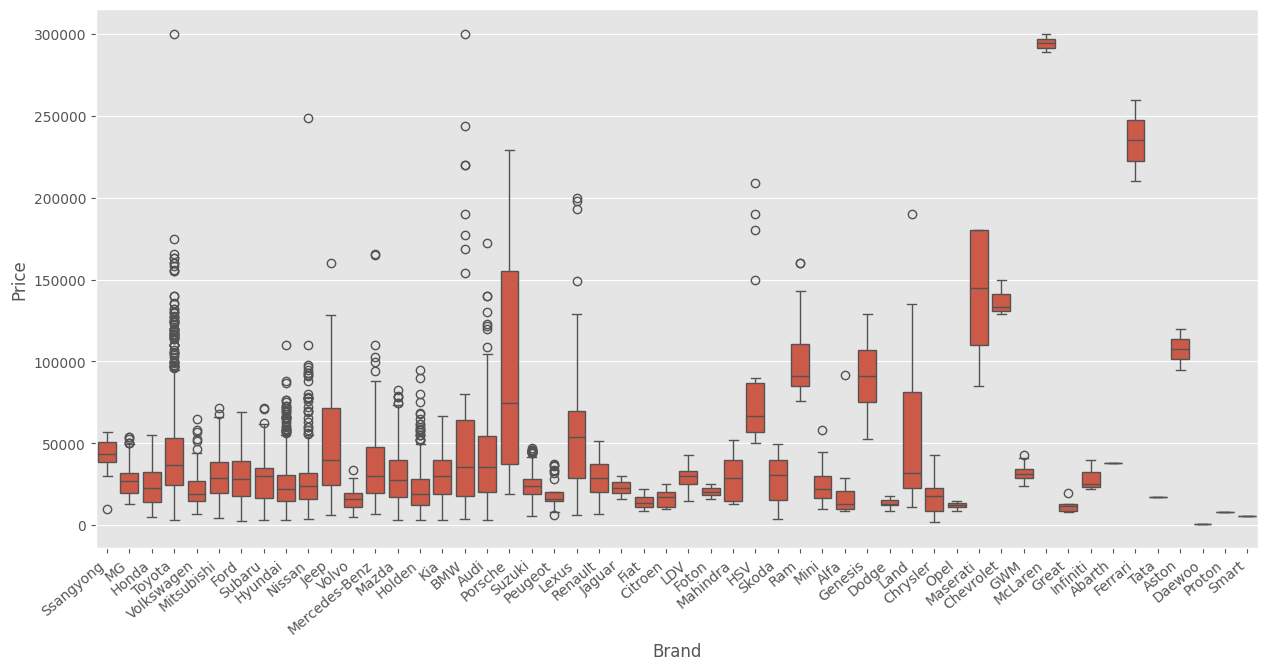

In [53]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Brand',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

Checking relationship of Year with Price

c:\Users\USER\anaconda3\envs\watchprice\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\anaconda3\envs\watchprice\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\anaconda3\envs\watchprice\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\anaconda3\envs\watchprice\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\USER\anaconda3\envs\watchprice\Lib\

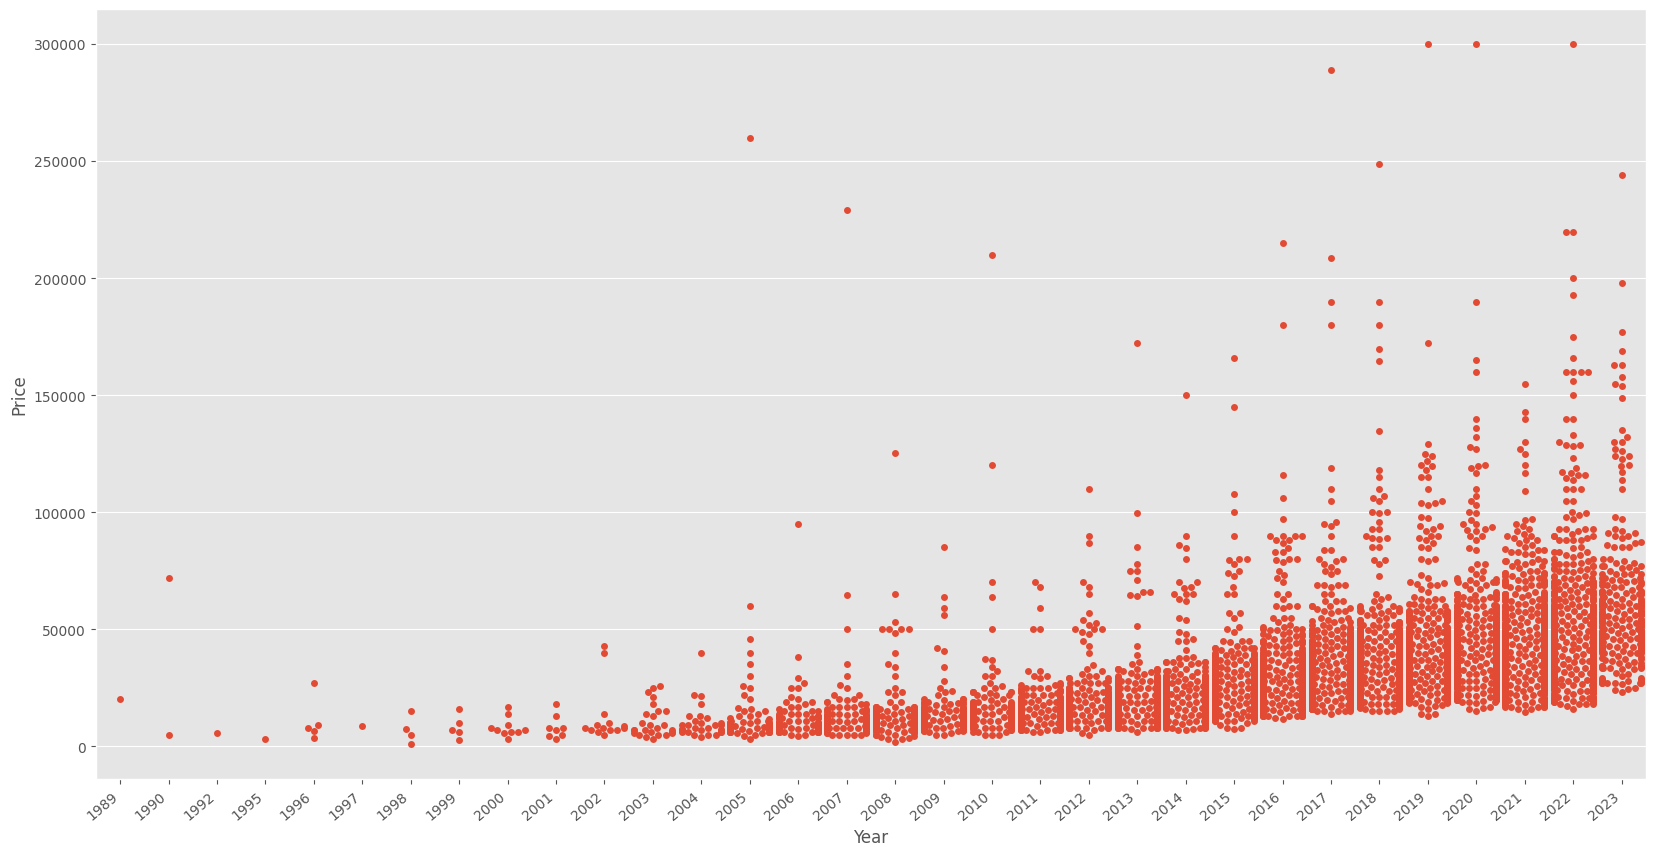

In [54]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

Model

In [55]:
X=car.drop(columns="Price")
y=car['Price']

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

Creating an OneHotEncoder object to contain all the possible categories

In [59]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7699 entries, 0 to 7707
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              7699 non-null   object 
 1   Year               7699 non-null   int64  
 2   Model              7699 non-null   object 
 3   Car/Suv            7699 non-null   object 
 4   Title              7699 non-null   object 
 5   UsedOrNew          7699 non-null   object 
 6   Transmission       7699 non-null   object 
 7   Engine             7699 non-null   float64
 8   DriveType          7699 non-null   object 
 9   FuelType           7699 non-null   object 
 10  FuelConsumption    7699 non-null   float64
 11  Kilometres         7699 non-null   int64  
 12  ColourExtInt       7699 non-null   object 
 13  Location           7699 non-null   object 
 14  CylindersinEngine  7699 non-null   int64  
 15  BodyType           7699 non-null   object 
 16  Doors              7699 non-n

In [71]:
ohe=OneHotEncoder()
ohe.fit(X[['Brand','Model','Car/Suv','Title','UsedOrNew','Transmission','DriveType','FuelType','ColourExtInt','Location','BodyType']])

OneHotEncoder()

Creating a column transformer to transform categorical columns

In [72]:
'''from sklearn.impute import SimpleImputer
column_trans=make_column_transformer(OneHotEncoder(categories=ohe.categories_),['Brand','FuelType',"Model","Engine"],(SimpleImputer,),remainder='passthrough')        '''
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Brand','Model','Car/Suv','Title','UsedOrNew','Transmission','DriveType','FuelType','ColourExtInt','Location','BodyType']),
                                    remainder='passthrough')               

Linear Regression Model

In [73]:
lr=LinearRegression()

Making a pipeline

In [74]:
pipe=make_pipeline(column_trans,lr)

Fitting the model

In [75]:
pipe.fit(X_train,y_train)

c:\Users\USER\anaconda3\envs\watchprice\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Abarth', 'Alfa', 'Aston', 'Audi', 'BMW', 'Chevrolet', 'Chrysler',
       'Citroen', 'Daewoo', 'Dodge', 'Ferrari', 'Fiat', 'Ford', 'Foton',
       'GWM', 'Genesis', 'Great', 'HSV', 'Holden', 'Honda', 'Hyundai',
       'Infiniti', 'Jaguar', 'Jeep', 'Kia...
       'Yarraville, VIC', 'Yass, NSW', 'Yatala, QLD', 'Youngtown, TAS',
       'Zetland, NSW'], dtype=object),
                                                                            array(['Commercial', 'Convertible', 'Coupe', 'Hatchback', 'Other',
       'People Mover', 'SUV', 'Sedan', 'Ute / Tray', 'Wagon'],
      dtype=object)]),
                                                  ['Brand', 'Model', 'Car/Suv',
                                                   'Title', 'UsedOrNew',
                                                   'Transmission', 'DriveType',
                                                   'FuelType', 'ColourExtInt',
                                                   'Location', 'BodyType'])])),
                ('linearregression', LinearRegression())])

In [76]:
y_pred=pipe.predict(X_test)

Checking R2 Score

In [77]:
r2_score(y_test,y_pred)

0.6115587068045547

Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [78]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [79]:
np.argmax(scores)

np.int64(264)

In [80]:
scores[np.argmax(scores)]

0.7784799709338924

In [82]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Toyota',	2021,'Corolla','Hatchback','2021 Toyota Corolla ZR Hybrid','USED','Automatic',	1.8,'Front','Hybrid',4.2,13694,'Black / -','Blacktown, NSW',4,'Hatchback',5,	5]).reshape(1,18)))


array([46578.25920572])

In [83]:
X_test.columns

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats'],
      dtype='object')

The best model is found at a certain random state

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7784799709338924

In [85]:
import pickle

In [87]:
pickle.dump(pipe,open('../model/LinearRegressionModelAus.pkl','wb'))

In [107]:
col=car.columns.to_list()
col=col[0:18]
print(col)
row=car.iloc[70]
row=row[0:18]
print(row)

pipe.predict(pd.DataFrame(columns=col,data=np.array(row).reshape(1,18)))

['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew', 'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption', 'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine', 'BodyType', 'Doors', 'Seats']
Brand                                          Subaru
Year                                             2016
Model                                         Outback
Car/Suv                                           SUV
Title                2016 Subaru Outback 2.5I Premium
UsedOrNew                                        USED
Transmission                                Automatic
Engine                                            2.5
DriveType                                         AWD
FuelType                                      Premium
FuelConsumption                                   7.3
Kilometres                                      74983
ColourExtInt                           Silver / Black
Location                         North Narrabeen, NSW
CylindersinEngine    

array([38622.19627426])